In [1]:
# https://squidpy.readthedocs.io/en/stable/notebooks/tutorials/tutorial_seqfish.html

# an example from :
# Tim Lohoff, Shila Ghazanfar, Alsu Missarova, Noushin Koulena, Nico Pierson, Jonathan A Griffiths, Evan S Bardot, Chee-Huat Linus Eng,
# Richard CV Tyser, Ricard Argelaguet, and others. 
# Highly multiplexed spatially resolved gene expression profiling of mouse organogenesis. bioRxiv, 2020.

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import scanpy as sc
import squidpy as sq

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

# load the pre-processed dataset
adata = sq.datasets.seqfish()

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\dask\dataframe\__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\core\decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


scanpy==1.10.4 anndata==0.11.1 umap==0.5.7 numpy==1.26.4 scipy==1.14.1 pandas==2.2.3 scikit-learn==1.5.2 statsmodels==0.14.4 igraph==0.11.8 pynndescent==0.5.13
squidpy==1.6.2


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\squidpy\pl\_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


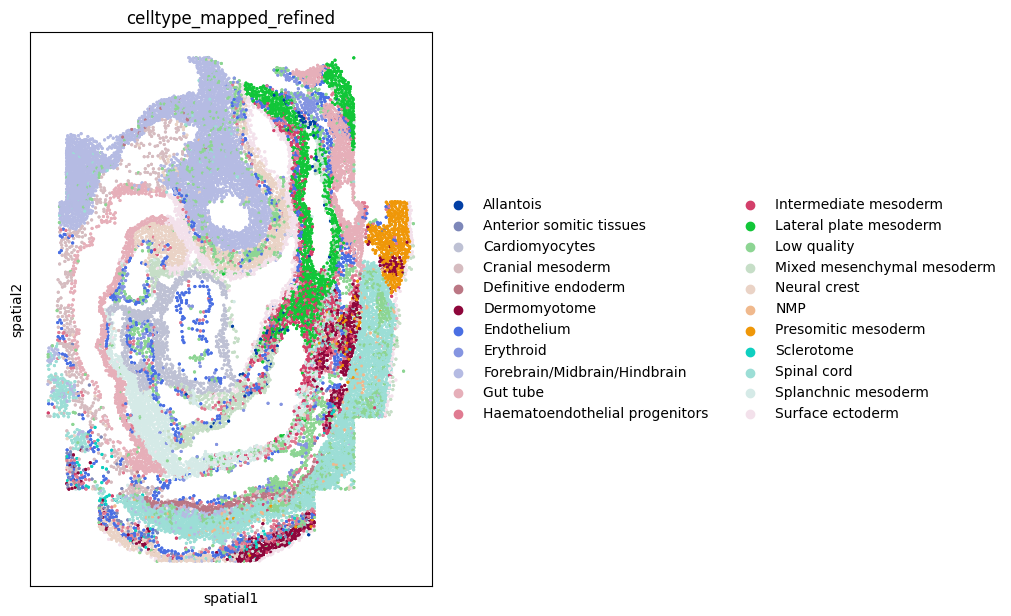

In [3]:
# Cluster Annotation in spatial context with squidpy.pl.spatial_scatter()

sq.pl.spatial_scatter(
    adata, 
    color="celltype_mapped_refined", 
    shape=None, figsize=(10, 10)
)

In [4]:
print('''
NEIGHBOURHOOD ENRICHMENT ANALYSIS : 

We can investigate spatial organization of clusters in a quantitative way, by computing a NEIGHBOURHOOD ENRICHMENT SCORE.

The function squidpy.gr.nhood_enrichment() computes the enrichment score based on spatial proximity of clusters: 
if spots belonging to two different clusters are often close to each other, 
then they will have a high score and can be defined as being ENRICHED. 

On the other hand, if they are far apart, the score will be low and they can be defined as DEPLETED. 
This score is based on a permutation-based test, and you can set the number of permutations with the n_perms argument (default is 1000).
''')


NEIGHBOURHOOD ENRICHMENT ANALYSIS : 

We can investigate spatial organization of clusters in a quantitative way, by computing a NEIGHBOURHOOD ENRICHMENT SCORE.

The function squidpy.gr.nhood_enrichment() computes the enrichment score based on spatial proximity of clusters: 
if spots belonging to two different clusters are often close to each other, 
then they will have a high score and can be defined as being ENRICHED. 

On the other hand, if they are far apart, the score will be low and they can be defined as DEPLETED. 
This score is based on a permutation-based test, and you can set the number of permutations with the n_perms argument (default is 1000).



In [5]:
sq.gr.spatial_neighbors(adata, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="celltype_mapped_refined")

  0%|          | 0/1000 [00:00<?, ?/s]

<Figure size 200x200 with 0 Axes>

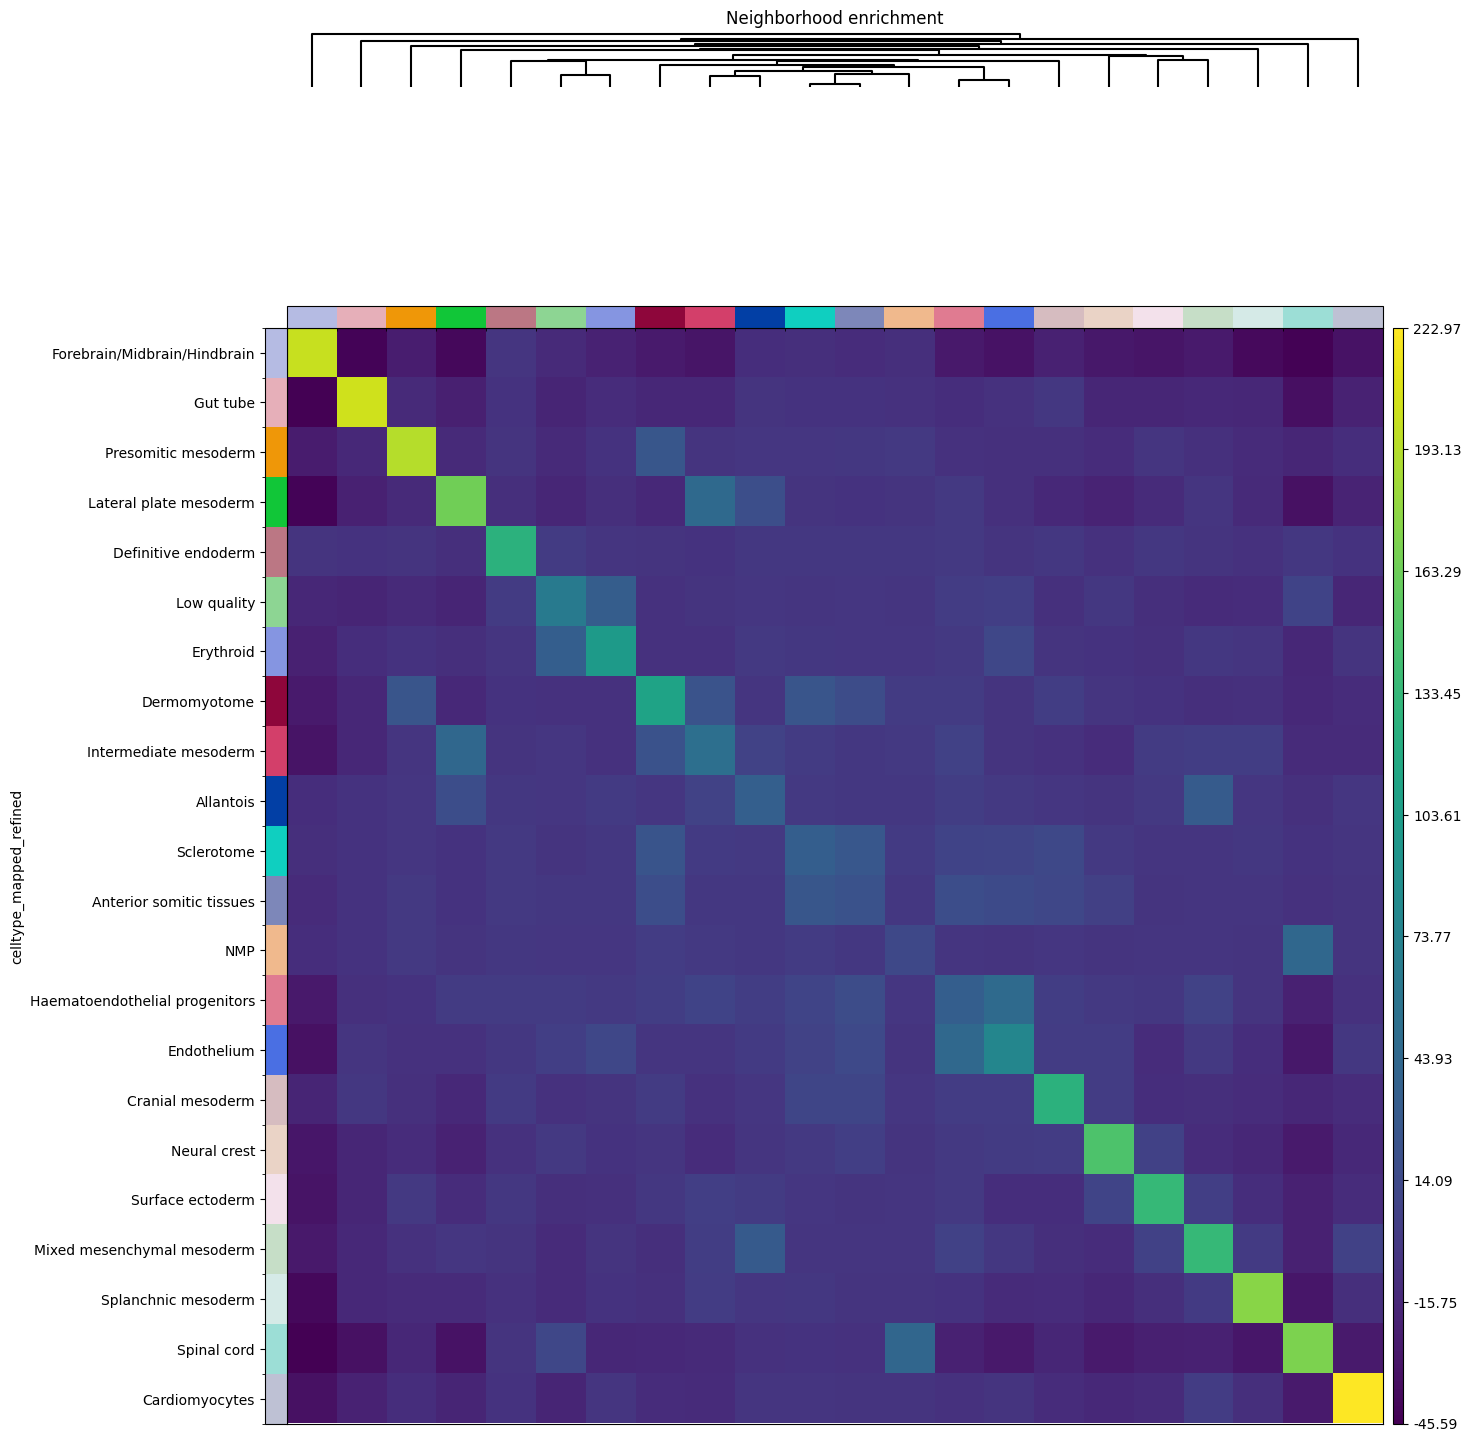

In [6]:
plt.figure(figsize=(2, 2)) 
sq.pl.nhood_enrichment(adata, cluster_key="celltype_mapped_refined", method="ward")

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\squidpy\pl\_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


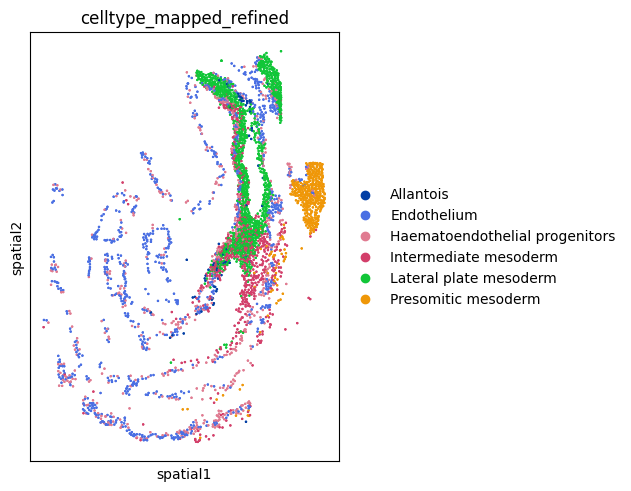

In [7]:
sq.pl.spatial_scatter(
    adata,
    color="celltype_mapped_refined",
    groups=[
        "Endothelium",
        "Haematoendothelial progenitors",
        "Allantois",
        "Lateral plate mesoderm",
        "Intermediate mesoderm",
        "Presomitic mesoderm",
    ],
    shape=None,
    size=2,
)

In [8]:
print("Co-occurrence across spatial dimensions :")
print('''
We can visualize cluster co-occurrence in spatial dimensions.
The score is computed across increasing radii size around each cell in the tissue.
''')

Co-occurrence across spatial dimensions :

We can visualize cluster co-occurrence in spatial dimensions.
The score is computed across increasing radii size around each cell in the tissue.



In [9]:
print(f"Number of cells: {adata.n_obs}")
print(f"Number of clusters: {adata.obs['celltype_mapped_refined'].nunique()}")

Number of cells: 19416
Number of clusters: 22


  0%|          | 0/1 [00:00<?, ?/s]

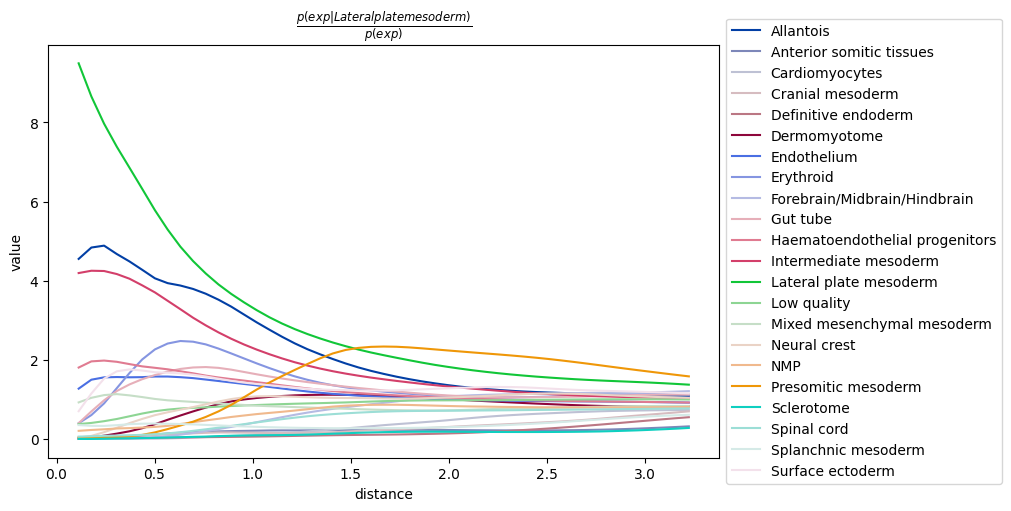

In [10]:
# Step 1: Compute co-occurrence
sq.gr.co_occurrence(
    adata,
    cluster_key="celltype_mapped_refined"
    # interval=[5, 10, 15]  # Define fewer intervals for optimization
)

# Step 2: Visualize co-occurrence
sq.pl.co_occurrence(
    adata,
    cluster_key="celltype_mapped_refined",
    clusters="Lateral plate mesoderm", 
    figsize=(10, 5)  #
)

In [11]:
# It seems to recapitulate a previous observation, that there is a co-occurrence between the conditional cell type 
# annotation Lateral plate mesoderm and the clusters Intermediate mesoderm and Allantois. 
# It also seems that at longer distances, there is a co-occurrence of cells belonging to the Presomitic mesoderm cluster.

In [12]:
import os

# Get the current working directory
current_folder = os.getcwd()

print(f"The current folder is: {current_folder}")

# List contents of the current folder
contents = os.listdir()

print("Contents of the current folder:")
for item in contents:
    print(item)

The current folder is: C:\Users\user\Desktop\Spatial_Transcriptomics
Contents of the current folder:
.ipynb_checkpoints
BRAIN_FRESH_FROZEN
cellphonedb
cellphonedb_techman
data
figures
interaction_input_cellphonedb_version_github.csv
interaction_input_cellphonedb_version_github.filtered
interaction_input_cellphonedb_version_github.filtered2
LYMPH_NODE
merfish
Scanpy_Spatial_Transcriptomics.ipynb
seqfish_2020.11.20.391896v1.full.pdf
spatial
Squidpy_MERFISH.ipynb
Squidpy_seqFISH.ipynb
Squidpy_SLIDE_seq2.ipynb
Squidpy_Visium.ipynb
Squidpy_Visium_HE.ipynb


In [13]:
print('''Ligand-receptor interaction analysis :

In Squidpy, we provide a fast re-implementation the popular method CellPhoneDB [Efremova et al., 2020] 
(code <https://github.com/Teichlab/cellphonedb) and extended its database of annotated ligand-receptor 
interaction pairs with the popular database Omnipath [Türei et al., 2016]. 
You can run the analysis for all clusters pairs with squidpy.gr.ligrec().
''')

Ligand-receptor interaction analysis :

In Squidpy, we provide a fast re-implementation the popular method CellPhoneDB [Efremova et al., 2020] 
(code <https://github.com/Teichlab/cellphonedb) and extended its database of annotated ligand-receptor 
interaction pairs with the popular database Omnipath [Türei et al., 2016]. 
You can run the analysis for all clusters pairs with squidpy.gr.ligrec().



In [14]:
# To install cellphonedb
# pip install cellphonedb
# cellphonedb --version

In [15]:
print("Available clusters:", adata.obs["celltype_mapped_refined"].unique())
print(adata.var.index[:3])  # Check the first 3 gene names

Available clusters: ['Low quality', 'Lateral plate mesoderm', 'Erythroid', 'Allantois', 'Gut tube', ..., 'Anterior somitic tissues', 'Presomitic mesoderm', 'Dermomyotome', 'Cardiomyocytes', 'Sclerotome']
Length: 22
Categories (22, object): ['Allantois', 'Anterior somitic tissues', 'Cardiomyocytes', 'Cranial mesoderm', ..., 'Sclerotome', 'Spinal cord', 'Splanchnic mesoderm', 'Surface ectoderm']
Index(['Abcc4', 'Acp5', 'Acvr1'], dtype='object')


In [16]:
# Download CellPhoneDB data
# cpdb_url = "https://raw.githubusercontent.com/Teichlab/cellphonedb-data/master/data/interaction_input.csv"
# interactions = pd.read_csv(cpdb_url)

# Filter interactions for ligands and receptors
# ligand_receptor_pairs = interactions[interactions['annotation_strategy'] == 'curated']
# ligand_receptor_pairs = ligand_receptor_pairs[['partner_a', 'partner_b']]

In [17]:
# Step 1: Load your ligand-receptor interaction file
file_LR = "interaction_input_cellphonedb_version_github.filtered2"  
interactions = pd.read_csv(file_LR, sep="\t")
print(interactions.head(2))

# Step 2: Rename columns to 'ligand' and 'receptor' for Squidpy compatibility

# interactions = interactions.rename(columns={
#    'protein_name_a': 'ligand',
#    'protein_name_b': 'receptor'
# })

interactions.rename(columns = {
               "protein_name_a": "source", 
               "protein_name_b": "target"}, inplace=True)

# Step 3: Inspect the DataFrame to ensure it looks correct
print(interactions.head(2))

if "source" not in interactions.columns or "target" not in interactions.columns:
    raise KeyError("The interactions DataFrame must include 'source' and 'target' columns.")

  protein_name_a protein_name_b
0          IFNA8          GP152
1          EPHA4          EFNB1
  source target
0  IFNA8  GP152
1  EPHA4  EFNB1


In [18]:
sq.gr.ligrec(
    adata,
    n_perms = 100,                             # Number of permutations
    threshold = 0.01,                          # Minimum expression threshold
    use_raw = False,                           # Use normalized data
    interactions = interactions,               # Properly formatted DataFrame
    cluster_key = "celltype_mapped_refined"    # Cluster key in AnnData
)

  0%|          | 0/100 [00:00<?, ?permutation/s]

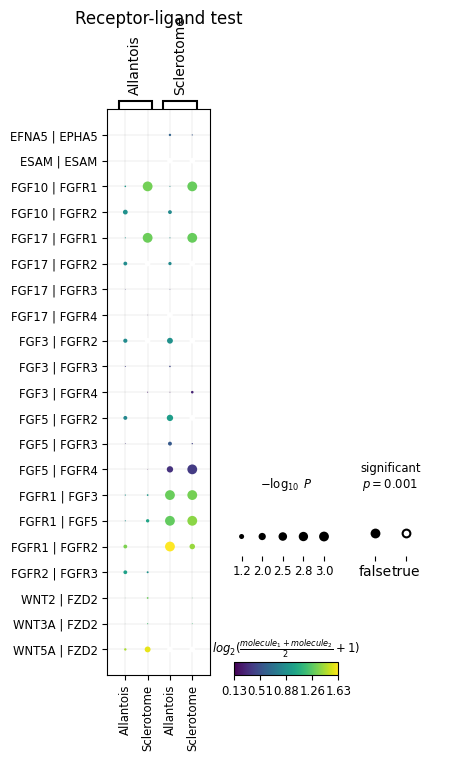

In [19]:
# Visualize ligand-receptor heatmap
sq.pl.ligrec(
    adata,
    key="ligrec",  # Key where results are stored
    cluster_key="celltype_mapped_refined",  # Cluster key in AnnData
    top_n_ligands=5,  # Number of top ligands to show
    top_n_receivers=5,  # Number of top receptors to show
    save="Squidpy_seqFISH_plot.png"  # Saves the plot
)

In [20]:
# sq.gr.ligrec(
#    adata,
#    n_perms=10,
#    # n_perms=1000,
#    cluster_key="celltype_mapped_refined",
#    copy=False,
#    use_raw=False,
#    interactions=interactions,
#    source_groups="Lateral plate mesoderm",
#    target_groups="Allantois",
#    transmitter_params={"source": "source"},
#    receiver_params={"target": "target"}
# )